In [195]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,4)

In [196]:
revenue = pd.read_csv('../data/revenue.csv')

In [197]:
revenue.head()

,Cabin (group),Cabin,Channel Type,Sub Channel Type,Ticket Type,Point of Sale,Rev (GBP) CY,Rev (GBP) PY,Passengers CY,Passengers PY,Average Fare (GBP) CY,Average Fare (GBP) PY
0,J,J,Consumer,Consolidator,IT Net,GB,"15,681","5,103",13.0,6.0,"1,206",851
1,J,J,Consumer,Consolidator,Published,NorAm,"5,983","3,391",13.0,4.0,460,848
2,J,J,Consumer,Consolidator,Published,Other,"1,974","6,605",4.0,12.0,494,550
3,J,J,Consumer,Consolidator,SME,GB,NaN,"1,747",NaN,1.0,NaN,"1,747"
4,J,J,Consumer,Consolidator,SO Net,NorAm,"7,521","2,250",14.0,2.0,537,"1,125"


In [198]:
revenue.tail()

,Cabin (group),Cabin,Channel Type,Sub Channel Type,Ticket Type,Point of Sale,Rev (GBP) CY,Rev (GBP) PY,Passengers CY,Passengers PY,Average Fare (GBP) CY,Average Fare (GBP) PY
441,Y,Y,Unmanaged,Consumer,SO Net,Other,572,625,3.0,3.0,191,208
442,Y,Y,Unmanaged,Consumer,Specialist,GB,368,490,1.0,2.0,368,245
443,Y,Y,Vhols,NaN,Group,GB,"11,634","7,337",72.0,58.0,162,127
444,Y,Y,Vhols,NaN,IT Net,GB,"4,435","10,157",25.0,64.0,177,159
445,Y,Y,Vhols,NaN,Published,GB,436,588,2.0,3.0,218,196


In [199]:
revenue.shape

(446, 12)

In [200]:
revenue.dtypes

Cabin (group)             object
Cabin                     object
Channel Type              object
Sub Channel Type          object
Ticket Type               object
Point of Sale             object
Rev (GBP) CY              object
Rev (GBP) PY              object
Passengers CY            float64
Passengers PY            float64
Average Fare (GBP) CY     object
Average Fare (GBP) PY     object
dtype: object

## Data Integrity Checks

#### categorical variables

In [201]:
categorical_columns = ['Cabin (group)', 'Cabin', 'Channel Type', 'Sub Channel Type', 'Ticket Type' , 'Point of Sale']

#### numerical variables

In [202]:
numerical_variables = [col for col in revenue.columns if col not in categorical_columns]
numerical_variables

['Rev (GBP) CY',
 'Rev (GBP) PY',
 'Passengers CY',
 'Passengers PY',
 'Average Fare (GBP) CY',
 'Average Fare (GBP) PY']

In [203]:
for col in numerical_variables:
    revenue[col] = revenue[col].apply(lambda value: str(value).replace(',', '')).apply(lambda value: np.nan if value=='nan' else float(value))

### working with missing values

In [204]:
revenue.isna().sum()*100/revenue.shape[0]

Cabin (group)             0.000000
Cabin                     0.000000
Channel Type              4.708520
Sub Channel Type          6.726457
Ticket Type               0.000000
Point of Sale             0.000000
Rev (GBP) CY             19.506726
Rev (GBP) PY             31.390135
Passengers CY            19.506726
Passengers PY            31.390135
Average Fare (GBP) CY    19.506726
Average Fare (GBP) PY    31.390135
dtype: float64

checking for missing values in categorical colums

In [205]:
for col in categorical_columns:
    print(col, revenue[col].unique())

Cabin (group) ['J' 'W' 'Y']
Cabin ['J' 'W' 'D' 'L' 'Y']
Channel Type ['Consumer' 'Direct' nan 'Other' 'TMC' 'Unmanaged' 'Vhols']
Sub Channel Type ['Consolidator' 'OTA' 'Retail' 'Student' 'Tour Op / Cruise' 'VFR' 'ATO'
 'CTO' 'OAL' 'Res' 'Staff' 'STAFF' 'Web' 'WNS' nan 'Unknown' 'Consortia'
 'Global' 'Local' 'Consumer' 'MICE / Groups' 'GSA' 'Travel Industry'
 'Unmanaged']
Ticket Type ['IT Net' 'Published' 'SME' 'SO Net' 'VFR' 'Net Fare' 'Portal' 'Corporate'
 'Entertainment' 'Specialist' 'Group' 'Flying Co Too' 'SO Net Type L'
 'Mates']
Point of Sale ['GB' 'NorAm' 'Other']


- imputing the missing values in the categorical columns with 'missing'

In [206]:
for col in categorical_columns:
    revenue[col] = revenue[col].fillna('missing')
revenue.isna().sum()

Cabin (group)              0
Cabin                      0
Channel Type               0
Sub Channel Type           0
Ticket Type                0
Point of Sale              0
Rev (GBP) CY              87
Rev (GBP) PY             140
Passengers CY             87
Passengers PY            140
Average Fare (GBP) CY     87
Average Fare (GBP) PY    140
dtype: int64

sneek peak of the distributions numerical variables to be able to determine the statistic that can be used to impute missing values

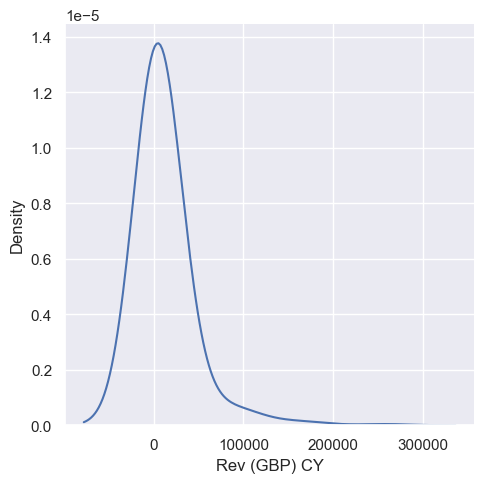

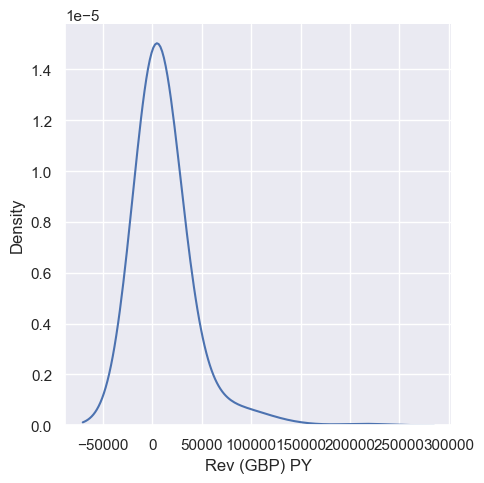

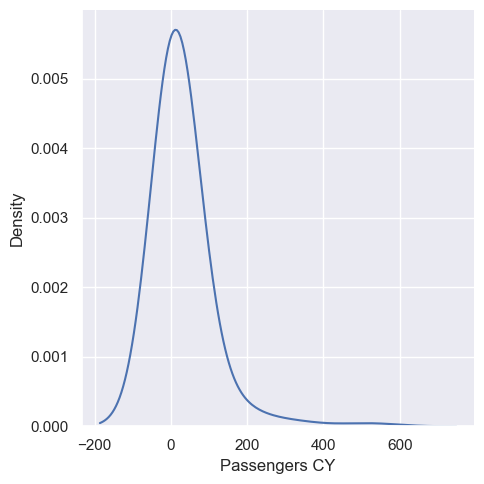

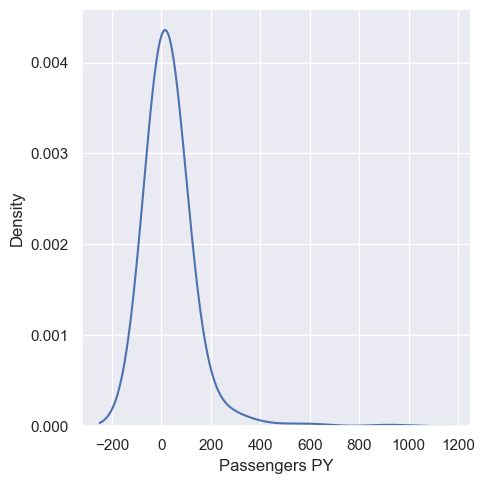

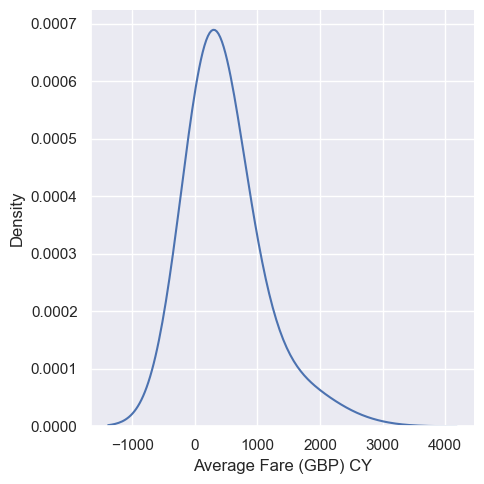

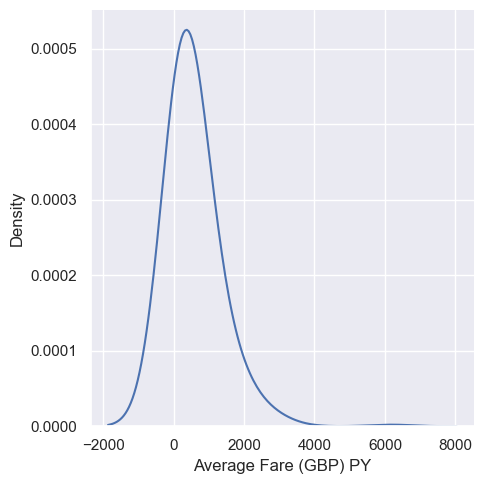

In [207]:
for col in numerical_variables:
    sns.displot(data=revenue, x=col, kind="kde", bw_adjust=3);

The data for all the numerical columns look skewed to the right I am going to impute the missing values using median. 

In [208]:
revenue[col].median()
for col in numerical_variables:
    revenue[col] = revenue[col].fillna(revenue[col].median())

In [209]:
revenue.isna().sum()

Cabin (group)            0
Cabin                    0
Channel Type             0
Sub Channel Type         0
Ticket Type              0
Point of Sale            0
Rev (GBP) CY             0
Rev (GBP) PY             0
Passengers CY            0
Passengers PY            0
Average Fare (GBP) CY    0
Average Fare (GBP) PY    0
dtype: int64

In [210]:
revenue.to_csv('../data/clean_revenue.csv', index=False)

### Questions
1. why are there missing values in the data? Is there a business meaning to the missing values?